## Gato

In [2]:

import networkx as nx ## para crear grafos y redes
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns ## basada en matplotlib --> especializada en graficos estadisticos

import scipy.io  ##para leer y escribir archivos de datos de distintos formatos

In [3]:
# definir la ruta del archivo .mat
file_path =r"C:\Users\Ana\Desktop\5to semestre\Modelos Computacionales\Neurociencias-2026-1\S03_datasets\cat.mat"

In [4]:
# leer el contenido del archivo.mat
file_dict = scipy.io.loadmat(file_path)

In [5]:
file_dict

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Wed May 29 16:24:29 2013',
 '__version__': '1.0',
 '__globals__': [],
 'CIJall': array([[0, 3, 3, ..., 0, 0, 0],
        [3, 0, 3, ..., 0, 0, 0],
        [3, 3, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(95, 95), dtype=uint8),
 'CIJctx': array([[0, 3, 3, ..., 0, 0, 0],
        [3, 0, 3, ..., 0, 0, 0],
        [3, 3, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 3],
        [0, 0, 0, ..., 2, 0, 2],
        [0, 0, 0, ..., 2, 2, 0]], shape=(52, 52), dtype=uint8),
 'Names': array(['    17', '    18', '    19', '  PLLS', '  PMLS', '  AMLS',
        '  ALLS', '   VLS', '   DLS', '   21a', '   21b', '   20a',
        '   20b', '     7', '   AES', '    PS', '    AI', '   AII',
        '   AAF', '     P', '   VPc', '   EPp', '   Tem', '    3a',
        '    3b', '     1', '     2', '   SII', '   SIV', '    4g',
        ' 

## Actividad
1. Abrir el dataset de cat.mat y usar data de "Names" y "CIJctx"
2. Generar el mapa de calor del dataframe asociado
    - Las columnas y las filas deben tener los nombres de los canales
3. Generar el histograma del dataset y determinar el porcentaje de cada valor
4. Filtrar el dataset con los valores <=1 , <=2 y <=3
    - Con cada filtrado, qué porcentaje de datos se están eliminando?
5. Generar el mapa de calor de cada dataset filtrado
6. Generar el grafo 2D de cada dataset filtrado.

In [6]:

# arreglo que contenga la variable CIJ
matriz = file_dict["CIJctx"]

In [7]:
# otra con los nombres
columnas = file_dict["Names"]

In [8]:
# creamos un data frame que incluya la matriz y los nombres
cat_df = pd.DataFrame(data = matriz, columns = columnas, index = columnas)

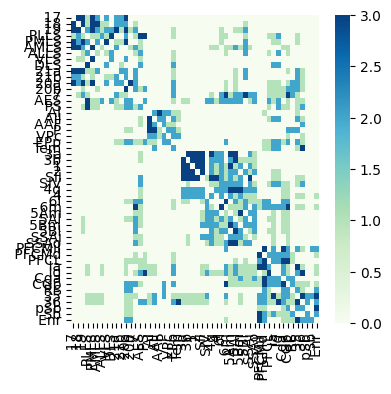

In [9]:
# generar el mapa de color del dataframe
plt.figure(figsize = (4,4))
ax = sns.heatmap(cat_df.values, 
                 annot = False, cmap = "GnBu", fmt = ".2f",
                 xticklabels = cat_df.columns, yticklabels = cat_df.columns)
plt.show()

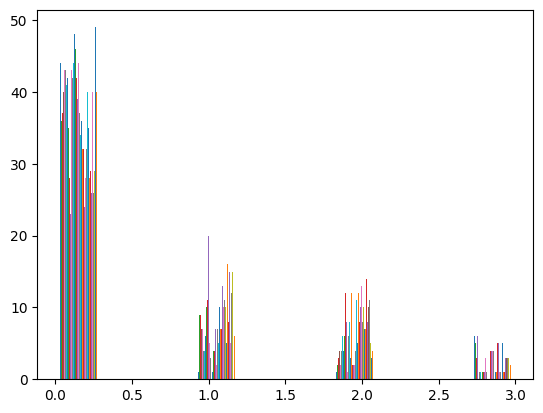

In [10]:
# generar el histograma
plt.hist(cat_df);


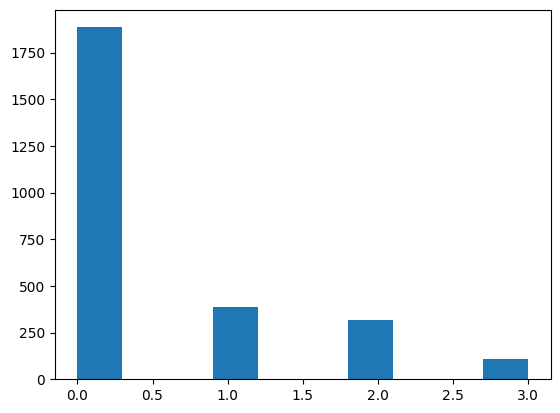

In [11]:
# juntando los datos, contar frecuencias
valores = cat_df.to_numpy().flatten()
hist = plt.hist(valores);

In [12]:
hist

(array([1886.,    0.,    0.,  389.,    0.,    0.,  319.,    0.,    0.,
         110.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

In [13]:
grado_0 = 1886 / 100
grado_1 = 389 / 100
grado_2 = 319 / 100
grado_3 = 110 / 100

grado_0, grado_1, grado_2, grado_3

(18.86, 3.89, 3.19, 1.1)

In [14]:
# filtrar dataset <=1
df_filt_1 = cat_df >= 1

In [ ]:
# 1.
# porcentaje de datos eliminados ? = 

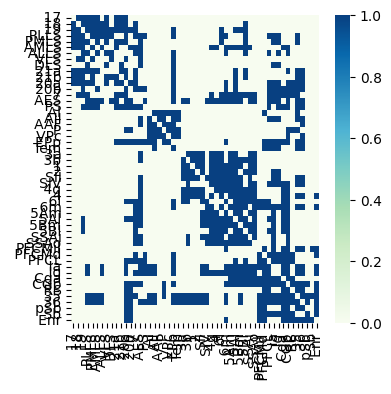

In [15]:
# mapa de calor
plt.figure(figsize = (4,4))
ax = sns.heatmap(df_filt_1.values, 
                 annot = False, cmap = "GnBu", fmt = ".2f",
                 xticklabels = df_filt_1.columns, yticklabels = df_filt_1.columns)
plt.show()

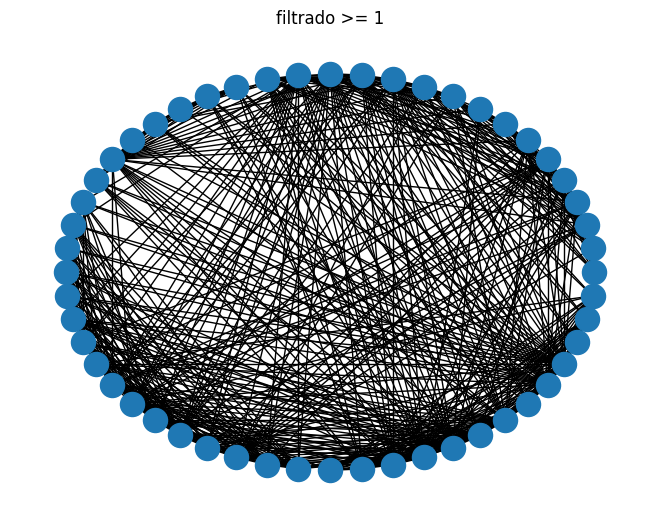

In [16]:
# grafo
G = nx.from_pandas_adjacency(df_filt_1)
nx.draw_circular(G)
plt.title("filtrado >= 1");

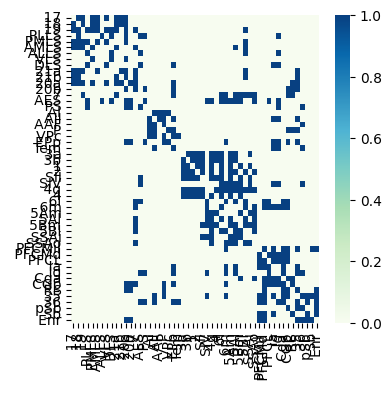

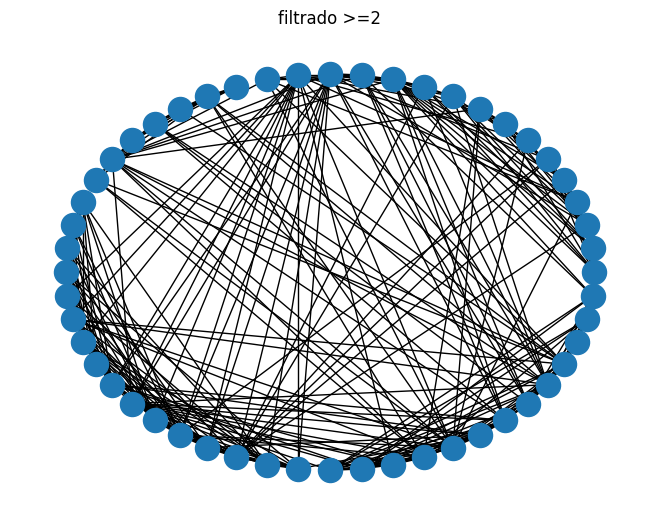

In [17]:
# filtrar dataset <= 2
df_filt_2 = cat_df >= 2

# mapa de calor
plt.figure(figsize = (4,4))
ax = sns.heatmap(df_filt_2.values, 
                 annot = False, cmap = "GnBu", fmt = ".2f",
                 xticklabels = df_filt_2.columns, yticklabels = df_filt_2.columns)
plt.show()

#grafo
G2 = nx.from_pandas_adjacency(df_filt_2)
nx.draw_circular(G2)
plt.title("filtrado >=2");


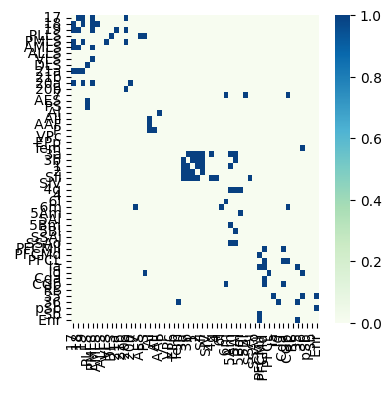

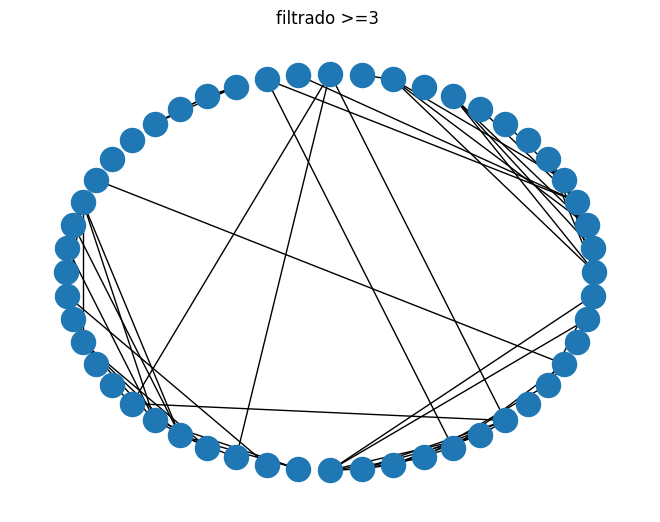

In [18]:

# filtrar dataset <= 3
df_filt_3 = cat_df >= 3

# mapa de calor
plt.figure(figsize = (4,4))
ax = sns.heatmap(df_filt_3.values, 
                 annot = False, cmap = "GnBu", fmt = ".2f",
                 xticklabels = df_filt_3.columns, yticklabels = df_filt_3.columns)
plt.show()

#grafo
G3 = nx.from_pandas_adjacency(df_filt_3)
nx.draw_circular(G3)
plt.title("filtrado >=3 ");